# QuickPUNCH data guide
A notebook guide to working with QuickPUNCH data in Python

In [1]:
# Load libraries

import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.wcs import WCS
from astropy.io.fits import header

import astropy.units as u

from sunpy.map import Map

from ndcube import NDCube

In [2]:
# Specify data filepath

wfi_qp_filename = './data/PUNCH_L2_WQM_20230704000000.fits'
nfi_qp_filename = './data/PUNCH_L2_NQN_20230704000000.fits'

In [3]:
# Open the HDU list, and read out the appropriate data
# As the data is RICE compressed, the *second* HDU contains the main data frame
# The third HDU contains a corresponding uncertainty array

with fits.open(wfi_qp_filename) as hdul:
    print('WFI QuickPUNCH HDU List:')
    hdul.info()
    wfi_qp_data = hdul[1].data
    wfi_qp_header = hdul[1].header
    wfi_qp_uncertainty = hdul[2].data

with fits.open(nfi_qp_filename) as hdul:
    print('NFI QuickPUNCH HDU List:')
    hdul.info()
    nfi_qp_data = hdul[1].data
    nfi_qp_header = hdul[1].header
    nfi_qp_uncertainty = hdul[2].data

WFI QuickPUNCH HDU List:
Filename: ./data/PUNCH_L2_WQM_20230704000000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    156   (1024, 1024)   float32   
  2  COMPRESSED_IMAGE    1 CompImageHDU      9   (1024, 1024)   uint8   
NFI QuickPUNCH HDU List:
Filename: ./data/PUNCH_L2_NQN_20230704000000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU    157   (1024, 1024)   float32   
  2  COMPRESSED_IMAGE    1 CompImageHDU      9   (1024, 1024)   uint8   


In [4]:
# The primary data arrays are stored as standard ndarrays
# The uncertainty data array has the dimensions as the primary data array
# Both the primary and uncertainty data arrays share the same header, contained in the primary HDU

print('WFI data array size:', wfi_qp_data.shape)
print('WFI uncertainty array size:', wfi_qp_uncertainty.shape)

WFI data array size: (1024, 1024)
WFI uncertainty array size: (1024, 1024)


In [5]:
# The corresponding headers can be queried as AstroPy header objects

wfi_qp_header['DATE-OBS']

'2023-07-04T00:00:00.00'

In [6]:
# The header information can be converted into an AstroPy WCS object

wfi_qp_data_wcs = WCS(wfi_qp_header);
nfi_qp_data_wcs = WCS(nfi_qp_header);

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Set MJD-BEG to 60129.000000 from DATE-BEG.
Set MJD-AVG to 60129.002778 from DATE-AVG.
Set MJD-END to 60129.005556 from DATE-END'. [astropy.wcs.wcs]


In [7]:
# Construct a SunPy Map object of out this data

wfi_qp_data_map = Map(wfi_qp_data, wfi_qp_header)
nfi_qp_data_map = Map(nfi_qp_data, nfi_qp_header)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


Observatory,PUNCH
Instrument,WFI+NFI MOSAIC
Detector,
Measurement,530.0 nm
Wavelength,530.0 nm
Observation Date,2023-07-04 00:00:00
Exposure Time,Unknown
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[0.045 0.045] deg / pix
Reference Pixel,[510.5 510.5] pix

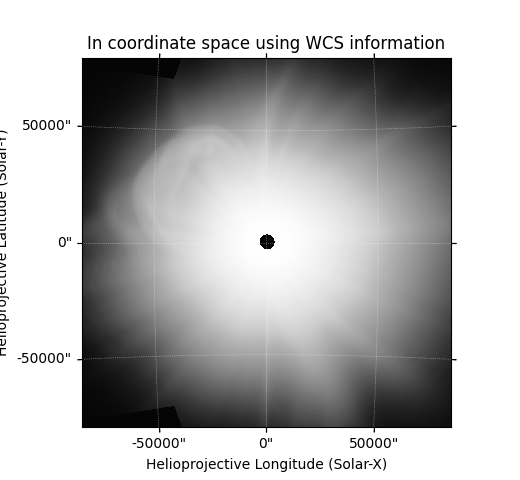
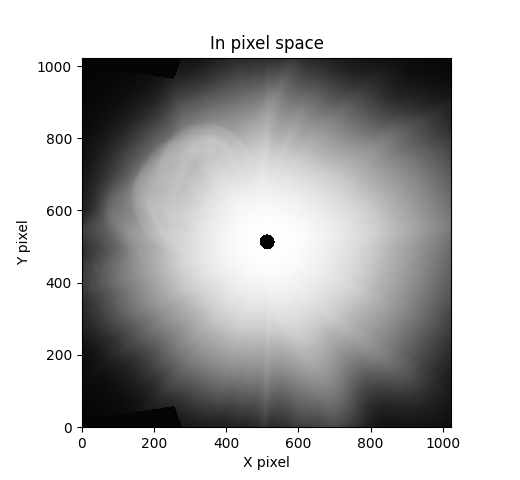
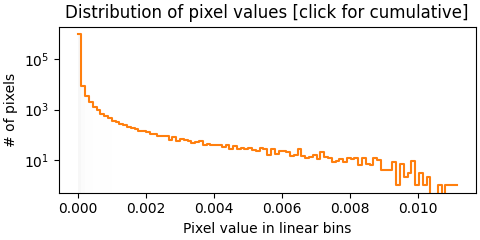
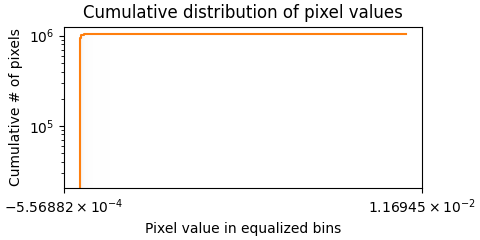

In [8]:
# Display this SunPY Map object

wfi_qp_data_map

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


Observatory,PUNCH
Instrument,NFI00
Detector,
Measurement,530.0 nm
Wavelength,530.0 nm
Observation Date,2023-07-04 00:00:00
Exposure Time,Unknown
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[0.026 0.026] deg / pix
Reference Pixel,[511.5 511.5] pix

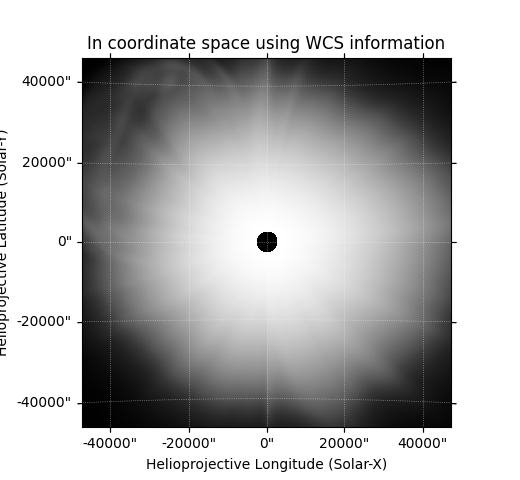
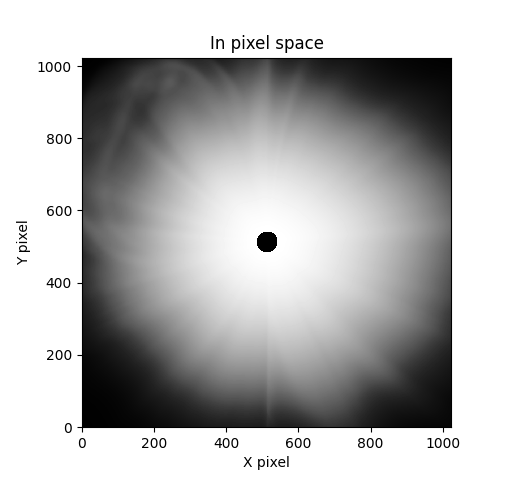
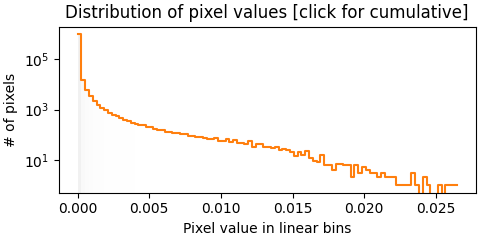
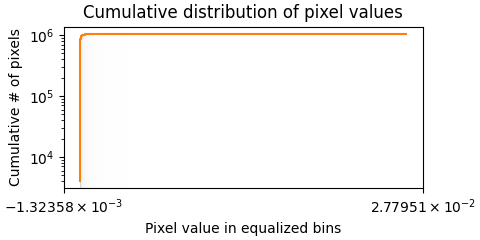

In [9]:
# Display this SunPY Map object

nfi_qp_data_map

In [10]:
# Construct an NDCube object out of this data

wfi_qp_data_ndcube = NDCube(wfi_qp_data, wcs=wfi_qp_data_wcs)
nfi_qp_data_ndcube = NDCube(nfi_qp_data, wcs=nfi_qp_data_wcs)

In [11]:
# Take a quick look at these NDCube objects

wfi_qp_data_ndcube, nfi_qp_data_ndcube

(<ndcube.ndcube.NDCube object at 0x7fbfe96fe3a0>
 NDCube
 ------
 Dimensions: [1024. 1024.] pix
 Physical Types of Axes: [('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat'), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat')]
 Unit: None
 Data Type: float32,
 NDCube
 ------
 Dimensions: [1024. 1024.] pix
 Physical Types of Axes: [('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat'), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat')]
 Unit: None
 Data Type: float32)

/var/folders/py/f06qj9p54jzfxlzpr79z7z0wvsr0ty/T/ipykernel_68963/3721481304.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(wfi_qp_data), cmap='Greys_r', vmin=-16, vmax=0)


Text(0.5, 1.0, 'QuickPUNCH Mosaic total brightness - 2023-07-04T00:00:00.00UT')

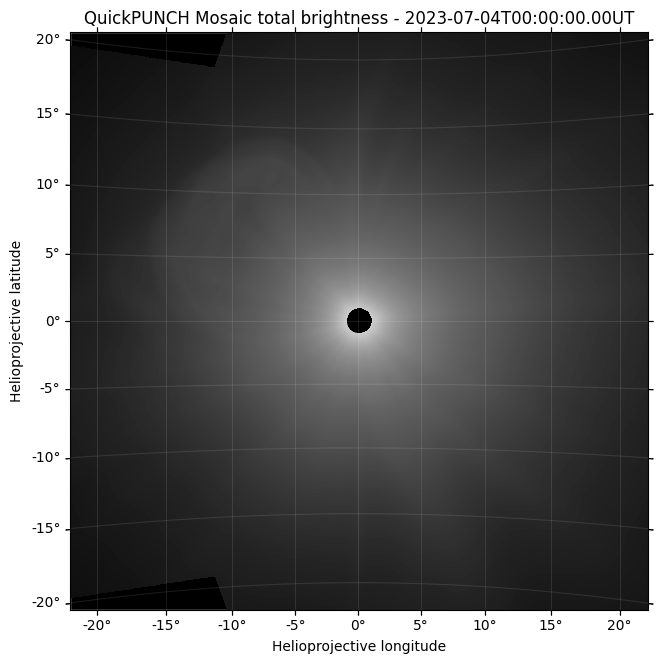

In [12]:
# Display this data in a regular plotting environment, using the associated WCS

plt.figure(figsize=(7.5, 7.5))
ax = plt.subplot(111, projection=wfi_qp_data_wcs)
plt.imshow(np.log(wfi_qp_data), cmap='Greys_r', vmin=-16, vmax=0)
lon, lat = ax.coords
lat.set_ticks(np.arange(-90, 90, 5) * u.degree)
lon.set_ticks(np.arange(-180, 180, 5) * u.degree)
lat.set_major_formatter('dd')
lon.set_major_formatter('dd')
ax.set_facecolor('black')
ax.coords.grid(color='white', alpha=.1)
plt.xlabel("Helioprojective longitude")
plt.ylabel("Helioprojective latitude")
plt.scatter(0, 0, s=240, color='k', transform=ax.get_transform('world'));
plt.title('QuickPUNCH Mosaic total brightness - ' + wfi_qp_header['DATE-OBS'] + 'UT')

/var/folders/py/f06qj9p54jzfxlzpr79z7z0wvsr0ty/T/ipykernel_68963/2980633537.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(nfi_qp_data), cmap='Greys_r', vmin=-16, vmax=0)


Text(0.5, 1.0, 'QuickPUNCH NFI total brightness - 2023-07-04T00:00:00.00UT')

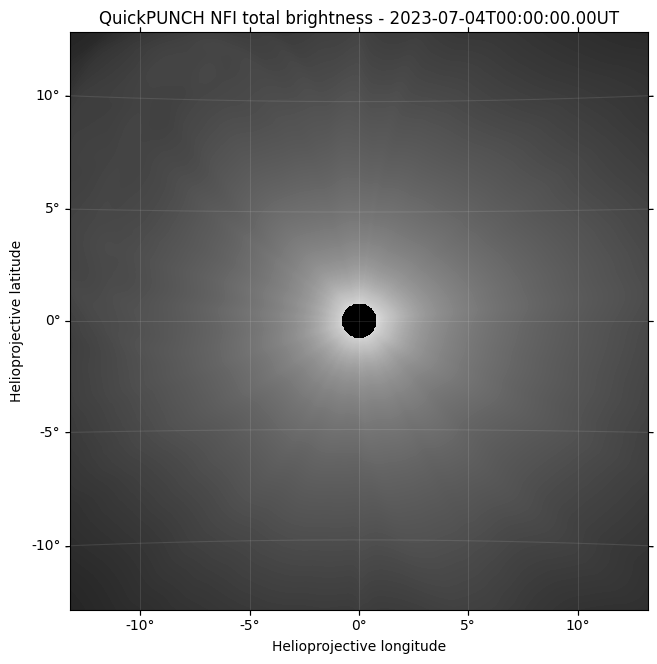

In [13]:
# Display this data in a regular plotting environment, using the associated WCS

plt.figure(figsize=(7.5, 7.5))
ax = plt.subplot(111, projection=nfi_qp_data_wcs)
plt.imshow(np.log(nfi_qp_data), cmap='Greys_r', vmin=-16, vmax=0)
lon, lat = ax.coords
lat.set_ticks(np.arange(-90, 90, 5) * u.degree)
lon.set_ticks(np.arange(-180, 180, 5) * u.degree)
lat.set_major_formatter('dd')
lon.set_major_formatter('dd')
ax.set_facecolor('black')
ax.coords.grid(color='white', alpha=.1)
plt.xlabel("Helioprojective longitude")
plt.ylabel("Helioprojective latitude")
plt.scatter(0, 0, s=240, color='k', transform=ax.get_transform('world'));
plt.title('QuickPUNCH NFI total brightness - ' + nfi_qp_header['DATE-OBS'] + 'UT')

In [14]:
# Again noting that these files are compressed, additional keywords will be visible when viewing these FITS files outside of Python.
# These keywords relate to the compression implementation, and can be retreived using astropy.io.fits, if needed, using the disable_image_compression keyword.

with fits.open(wfi_qp_filename, disable_image_compression=True) as hdul:
    header_compression = hdul[1].header

header_compression

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                 1024 / number of rows in table                        
PCOUNT  =              1602185 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'COMPRESSED_DATA'    / label for field 1                              
TFORM1  = '1PB(1985)'          / data format of field: variable length array    
TTYPE2  = 'GZIP_COMPRESSED_DATA' / label for field 2                            
TFORM2  = '1PB(0)  '           / data format of field: variable length array    
TTYPE3  = 'ZSCALE  '        